In [39]:
import numpy as np
import math
from numpy.random import default_rng

In [160]:
# Proposal distribution
def Q(previous_x):
    return previous_x + rng.standard_normal(1)[0]

def Q_density(new_x, given):
    return (1/math.sqrt(2 * math.pi) ) * math.e**(-0.5 *((new_x - given)/1)**2)

# Unnormalised probability distribution we want to sample from
def P(x):
    return math.e**(-0.5 *((x - 5)/5)**2)

## Initialisation Step

In [161]:
rng = default_rng()
x_old = -10 # arbitrarily pick x_0 to be 0

## Iterative Steps

In [162]:
samples = []
while len(samples) < 400000:
    # Generate random candidate x':
    proposal = g(x_old)
    # calculate acceptance probability
    P_ratio = P(proposal)/P(x_old)
    Q_ratio = Q_density(x_old, proposal)/Q_density(proposal, x_old)
    acceptance_prob = min(1, P_ratio * Q_ratio)
    # accept or reject
    u = rng.random()
    if (u <= acceptance_prob):
        x_old = proposal
        samples.append(proposal)
    else:
        x_old = x_old
        samples.append(x_old)
    
    
    


In [163]:
from matplotlib import pyplot as plt

(array([3.49000e+02, 5.44600e+03, 2.97410e+04, 8.87110e+04, 1.31377e+05,
        9.81680e+04, 3.82700e+04, 7.15000e+03, 6.98000e+02, 9.00000e+01]),
 array([-14.53051197, -10.2548803 ,  -5.97924863,  -1.70361695,
          2.57201472,   6.84764639,  11.12327806,  15.39890973,
         19.67454141,  23.95017308,  28.22580475]),
 <BarContainer object of 10 artists>)

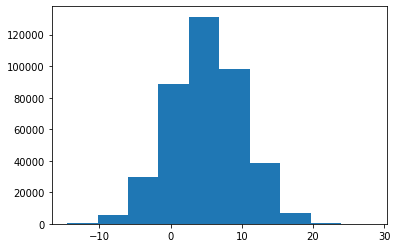

In [164]:
plt.hist(samples)